# Classify English Handwritten Characters through Multi Layer PLA

## Import necessary libraries

In [12]:
!pip install opendatasets

In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
import opendatasets as od
import pandas as pd

#od.download('https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset/data')

# Load the dataset from CSV file

In [16]:
df = pd.read_csv('archive/english.csv')
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


# Read an image and display it

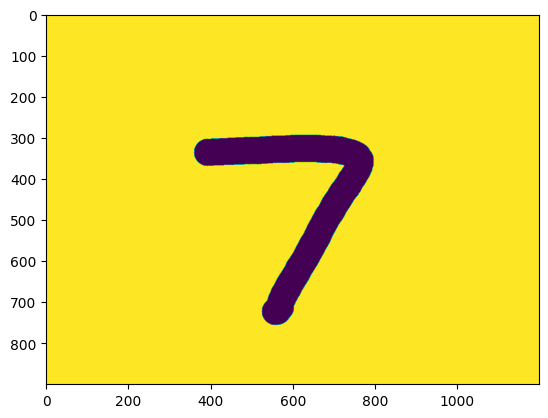

In [18]:
img = cv2.imread('archive/Img/img008-025.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

# Resize the image and display it again

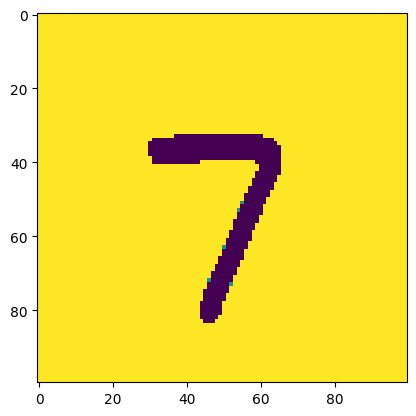

In [19]:
img = cv2.resize(img,(100,100))
plt.imshow(img)

In [20]:
img.shape

(100, 100)

# Add the image path to the dataset

In [21]:
df['image'] = 'archive/' + df['image']

# Preprocess the labels

In [22]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label']= label_encoder.fit_transform(df['label'])


In [23]:
df

,image,label
0,archive/Img/img001-001.png,0
1,archive/Img/img001-002.png,0
2,archive/Img/img001-003.png,0
3,archive/Img/img001-004.png,0
4,archive/Img/img001-005.png,0
...,...,...
3405,archive/Img/img062-051.png,61
3406,archive/Img/img062-052.png,61
3407,archive/Img/img062-053.png,61
3408,archive/Img/img062-054.png,61


# Load the images and labels into lists

In [24]:
images = []
labels = []

def imageLoad(row):
  path = row['image']
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(100,100))
  images.append(img)
  labels.append(row['label'])


In [25]:
df.apply(imageLoad,axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
3405    None
3406    None
3407    None
3408    None
3409    None
Length: 3410, dtype: object

# Split the dataset into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,labels , random_state=102,  test_size=0.20,  shuffle=True)

# Convert the datasets to tensors

In [27]:
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train)

X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)




# Normalize the pixel values

In [ ]:

X_train = X_train/255
X_test = X_test/255

# Define the neural network model

In [29]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [30]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(100,100,1)))
model.add(layers.Dense(728,activation='relu'))
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(62,activation='softmax'))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 728)               7280728   
                                                                 
 dense_1 (Dense)             (None, 500)               364500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 60)                6060      
                                                                 
 dense_5 (Dense)             (None, 62)                3

# Compile the model

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model

In [33]:
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_test, y_test))

Epoch 1/150
86/86 [==============================] - 4s 33ms/step - loss: 4.1398 - accuracy: 0.0202 - val_loss: 4.1282 - val_accuracy: 0.0220
Epoch 2/150
86/86 [==============================] - 3s 30ms/step - loss: 4.1293 - accuracy: 0.0224 - val_loss: 4.1335 - val_accuracy: 0.0235
Epoch 3/150
86/86 [==============================] - 2s 28ms/step - loss: 4.1276 - accuracy: 0.0169 - val_loss: 4.1257 - val_accuracy: 0.0161
Epoch 4/150
86/86 [==============================] - 3s 29ms/step - loss: 4.1197 - accuracy: 0.0231 - val_loss: 4.1176 - val_accuracy: 0.0220
Epoch 5/150
86/86 [==============================] - 3s 29ms/step - loss: 4.1160 - accuracy: 0.0257 - val_loss: 4.1179 - val_accuracy: 0.0220
Epoch 6/150
86/86 [==============================] - 3s 29ms/step - loss: 4.1096 - accuracy: 0.0224 - val_loss: 4.1000 - val_accuracy: 0.0103
Epoch 7/150
86/86 [==============================] - 3s 29ms/step - loss: 4.0989 - accuracy: 0.0275 - val_loss: 4.0961 - val_accuracy: 0.0205
Epoch 

# Plot the accuracy and loss of the model

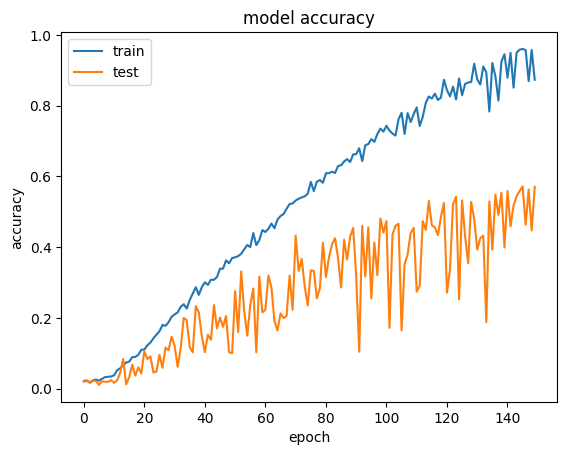

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [48]:
print("Accuracy at 150 epochs: {:.2f}%".format(history.history['val_accuracy'][-1]*100))

Accuracy at 150 epochs: 57.04%


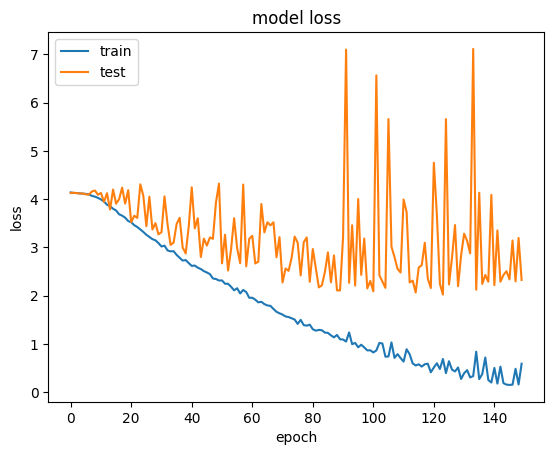

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [39]:
print("Loss at 150 epochs: {:.2f}".format(history.history['loss'][-1]))

Loss at 150 epochs: 0.59


# Classify English Handwritten Characters through CNN

In [40]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\english.csv
archive\Img\img001-001.png
archive\Img\img001-002.png
archive\Img\img001-003.png
archive\Img\img001-004.png
archive\Img\img001-005.png
archive\Img\img001-006.png
archive\Img\img001-007.png
archive\Img\img001-008.png
archive\Img\img001-009.png
archive\Img\img001-010.png
archive\Img\img001-011.png
archive\Img\img001-012.png
archive\Img\img001-013.png
archive\Img\img001-014.png
archive\Img\img001-015.png
archive\Img\img001-016.png
archive\Img\img001-017.png
archive\Img\img001-018.png
archive\Img\img001-019.png
archive\Img\img001-020.png
archive\Img\img001-021.png
archive\Img\img001-022.png
archive\Img\img001-023.png
archive\Img\img001-024.png
archive\Img\img001-025.png
archive\Img\img001-026.png
archive\Img\img001-027.png
archive\Img\img001-028.png
archive\Img\img001-029.png
archive\Img\img001-030.png
archive\Img\img001-031.png
archive\Img\img001-032.png
archive\Img\img001-033.png
archive\Img\img001-034.png
archive\Img\img001-035.png
archive\Img\img001-036.png
archive\

# Problem statement
The dataset contains 3410 images containing handwritten letters (0-9 numbers, a-z alphabets small and in caps)
The goal is to train the model to recognize and predict the characters efficiently and categorize between 62 unique characters

I'm trying the classification through CNN


**import the libraries**

In [43]:
import pandas
import random
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt

# Split the dataset
In this step, we'll split the data into 3 datasets - training set, validation test and test set
Out of total 3410 images, 2910 to training set, 490 added to validation set, 5 to test set
Removed the images added to validation, test set from training set to test its accuracy

In [44]:
data_path = r"archive"

dataset = pandas.read_csv(data_path + '/english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pandas.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 12)
test_set = pandas.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)

print(test_set)

                 image label
0   Img/img004-043.png     3
1   Img/img029-039.png     S
2   Img/img023-048.png     M
3   Img/img006-017.png     5
4   Img/img020-027.png     J
5   Img/img020-043.png     J
6   Img/img023-046.png     M
7   Img/img059-028.png     w
8   Img/img060-029.png     x
9   Img/img009-020.png     8
10  Img/img027-050.png     Q
11  Img/img029-053.png     S


# Data preprocessing
Now that the data is split, lets start with preprocessing step

Load the images through **flow_from_dataframe** method
This method is convinient since the data file (english.csv) contains the image names along with the classification class details

In [45]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 488 validated image filenames belonging to 62 classes.
Found 12 validated image filenames belonging to 9 classes.


# Building the CNN model
We are about to build CNN model using libraries provided through **TensorFlow**

Code block breakdown:
* Create Convolution layer: to read/process the image, one feature or one part at a time
* Create Pooling layer: used to reduce the spatial size of convolved image
* Create Flattening layer: used to flatten the result, whose output would be the input for the neural network 

We can create multiple convolution and pooling layer depending upon the need/complexity of the dataset

In [46]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

# Building, compiling and training the neural network

From the above step we have received the flattened matrix of the images that we processed
We are going to feed it to our neural network and train it

In this section, created fully connected Neural network aka Dense network, chosen sigmoid function for activation type
In below the model will learn from the training set and predicts the data from validation set

The model accuracy improves as the epochs iteration progresses

In [47]:
# add full connection, output layer
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

Epoch 1/30
91/91 [==============================] - 49s 523ms/step - loss: 3.7126 - accuracy: 0.1058 - val_loss: 2.6056 - val_accuracy: 0.3525
Epoch 2/30
91/91 [==============================] - 35s 382ms/step - loss: 1.8850 - accuracy: 0.5055 - val_loss: 1.5906 - val_accuracy: 0.5799
Epoch 3/30
91/91 [==============================] - 34s 370ms/step - loss: 1.1412 - accuracy: 0.6845 - val_loss: 1.3657 - val_accuracy: 0.6639
Epoch 4/30
91/91 [==============================] - 35s 380ms/step - loss: 0.8307 - accuracy: 0.7491 - val_loss: 1.3678 - val_accuracy: 0.6455
Epoch 5/30
91/91 [==============================] - 34s 376ms/step - loss: 0.6413 - accuracy: 0.7997 - val_loss: 1.2448 - val_accuracy: 0.6783
Epoch 6/30
91/91 [==============================] - 36s 399ms/step - loss: 0.4814 - accuracy: 0.8546 - val_loss: 1.2550 - val_accuracy: 0.6885
Epoch 7/30
91/91 [==============================] - 36s 393ms/step - loss: 0.3842 - accuracy: 0.8777 - val_loss: 1.2418 - val_accuracy: 0.7234

# Predicting the testset images

Since the model is trained, lets pass the testset images and see how well our model predicts
class_indices function gives us the neural network mapping for our 62 characters

The result image's name is the predicted character by our model

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
1/1 [==============================] - 0s 246ms/step
Max index:  [3, 54, 22, 3, 19, 19, 22, 58, 59, 8, 26, 28]


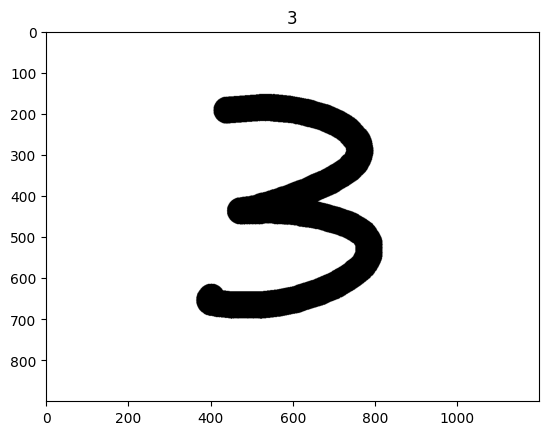

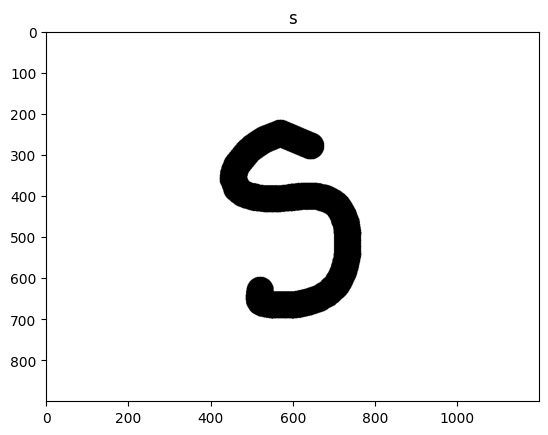

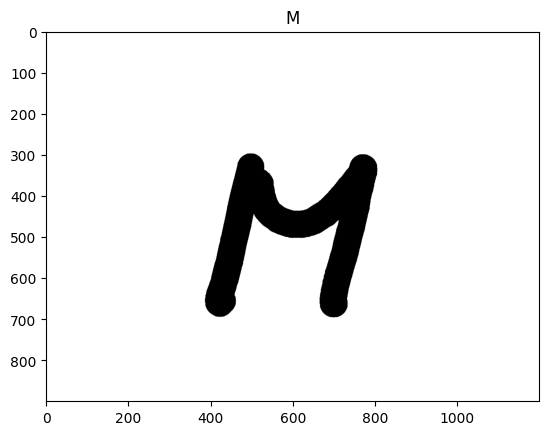

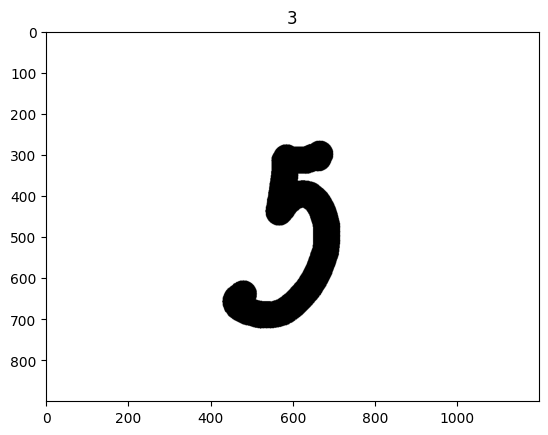

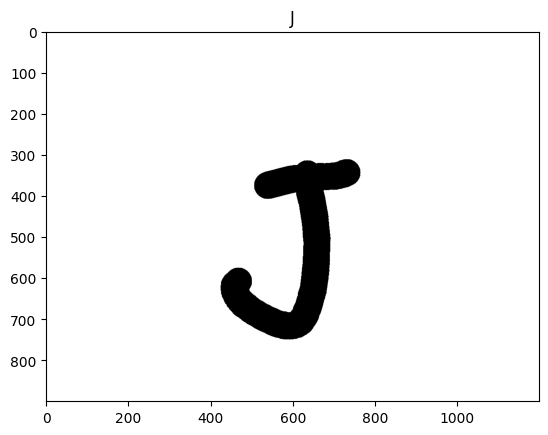

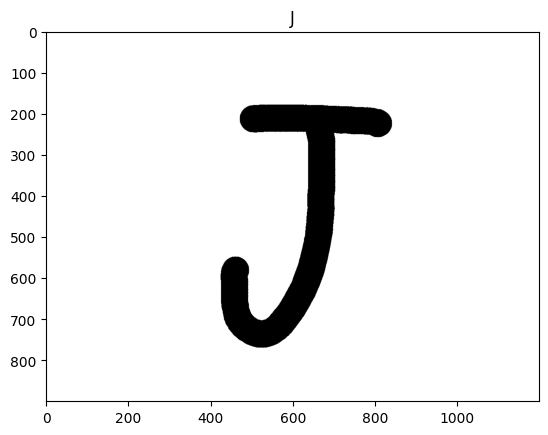

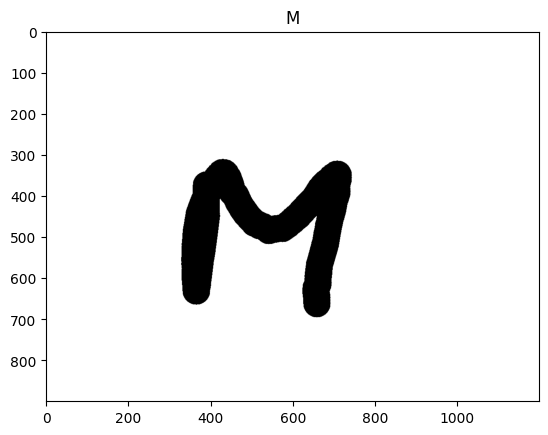

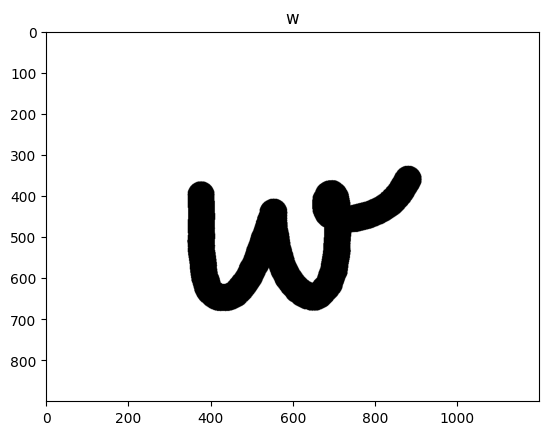

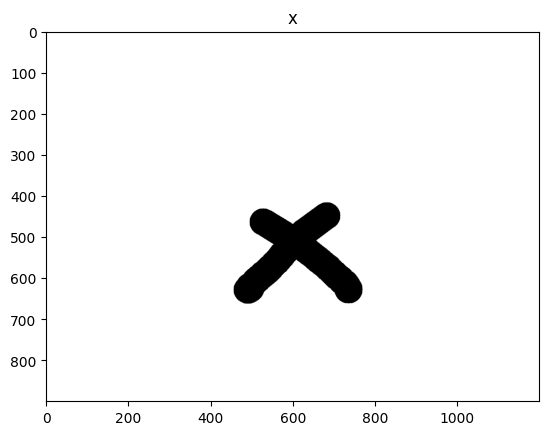

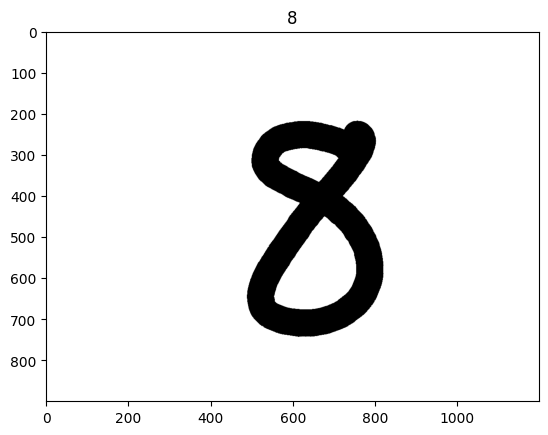

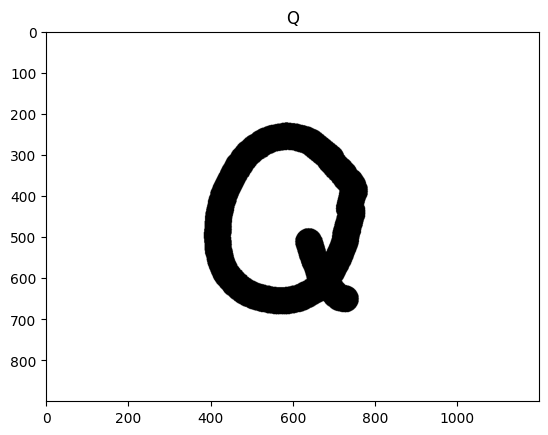

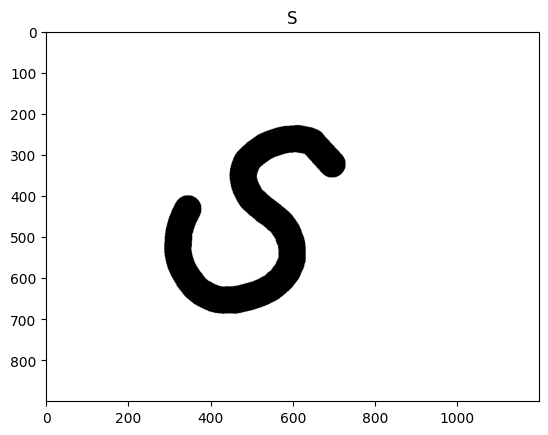

In [49]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pandas.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(data_path + '/' + test_set.at[i, 'image'])
    plt.title(switcher.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

1/1 [==============================] - 0s 153ms/step


C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: Unde

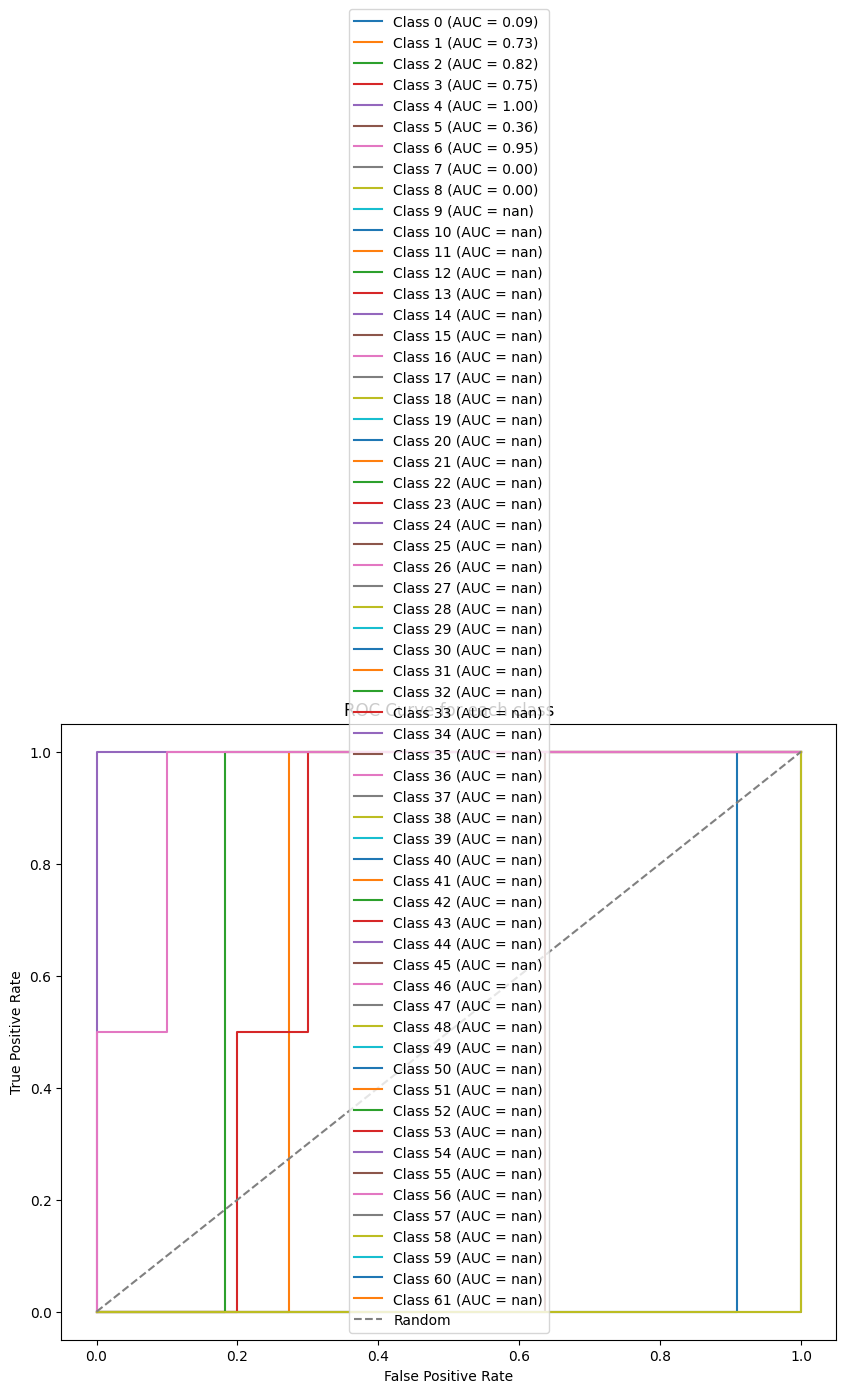

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to convert labels to one-hot encoding
def convert_to_one_hot(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

# Convert labels to one-hot encoding for training and test sets
train_labels_one_hot = convert_to_one_hot(training_data_frame.classes, 62)
test_labels_one_hot = convert_to_one_hot(test_data_frame.classes, 62)

# Predict probabilities for the test set
test_pred_prob = cnn.predict(test_data_frame)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(62):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()


1/1 [==============================] - 0s 179ms/step


C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: Unde

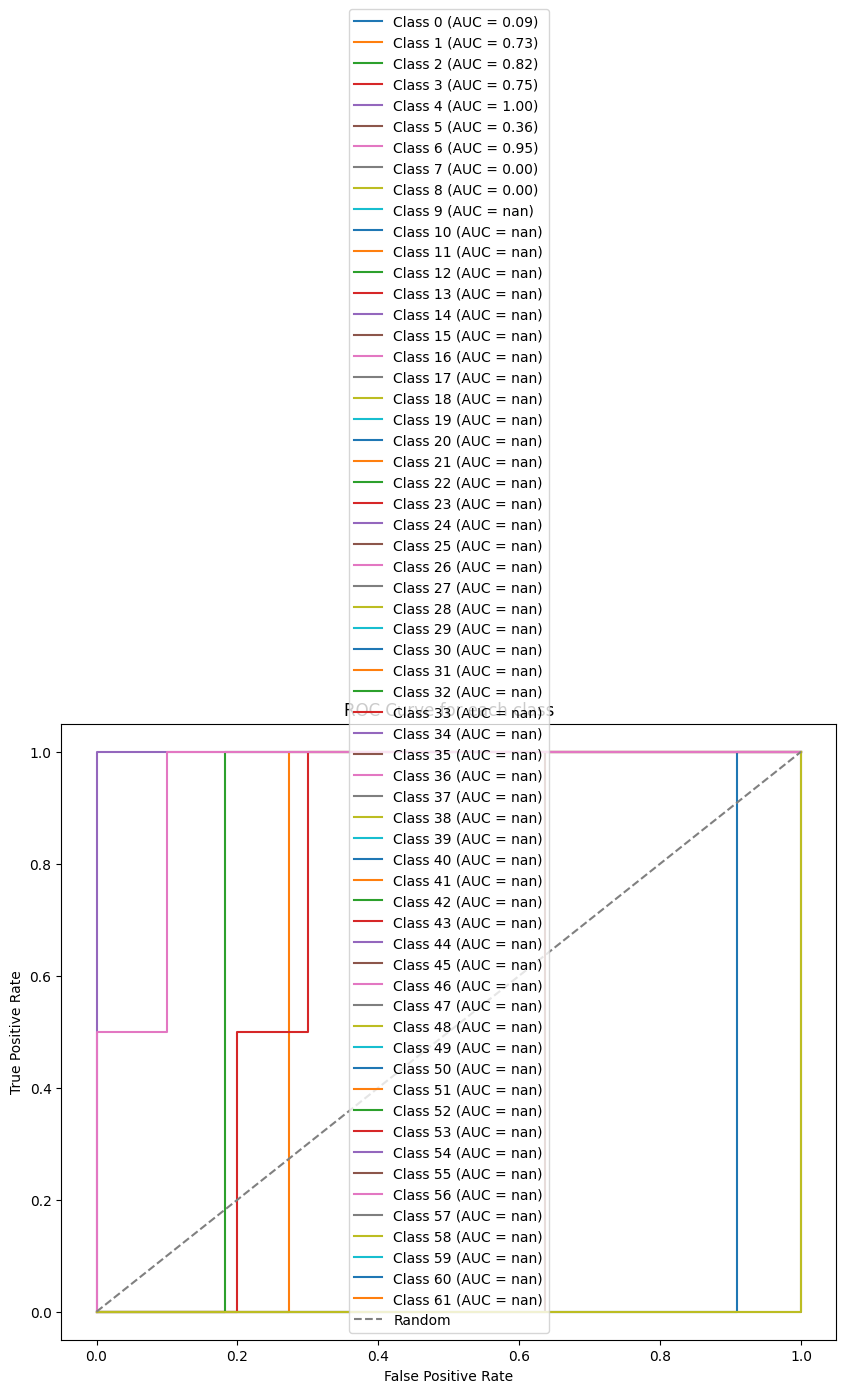

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def convert_to_one_hot(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

# Convert labels to one-hot encoding for training and test sets
train_labels_one_hot = convert_to_one_hot(training_data_frame.classes, 62)
test_labels_one_hot = convert_to_one_hot(test_data_frame.classes, 62)

# Predict probabilities for the test set
test_pred_prob = cnn.predict(test_data_frame)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()
